In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_to_csv = './telecom_churn.csv'
df = pd.read_csv(path_to_csv)
print(df.shape)
df.head()

(3333, 20)


State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

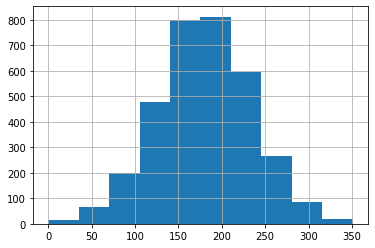

In [3]:
df['Total day minutes'].hist();

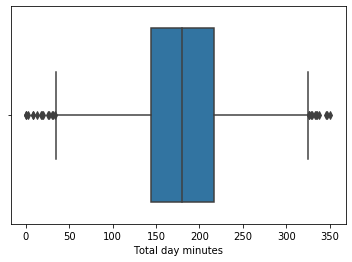

In [4]:
sns.boxplot(df['Total day minutes']);

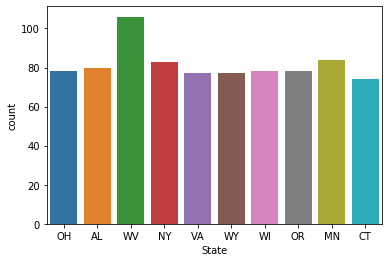

In [5]:
states = df['State'].value_counts().head(10).index
only_popular = df[df['State'].isin(states)]
sns.countplot(only_popular['State']);

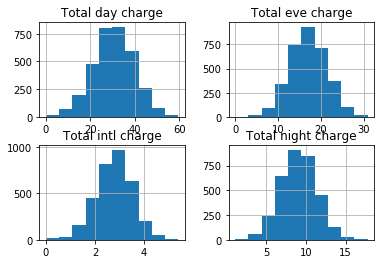

In [6]:
feat =[f for f in df.columns.values if 'charge' in f]
df[feat].hist();

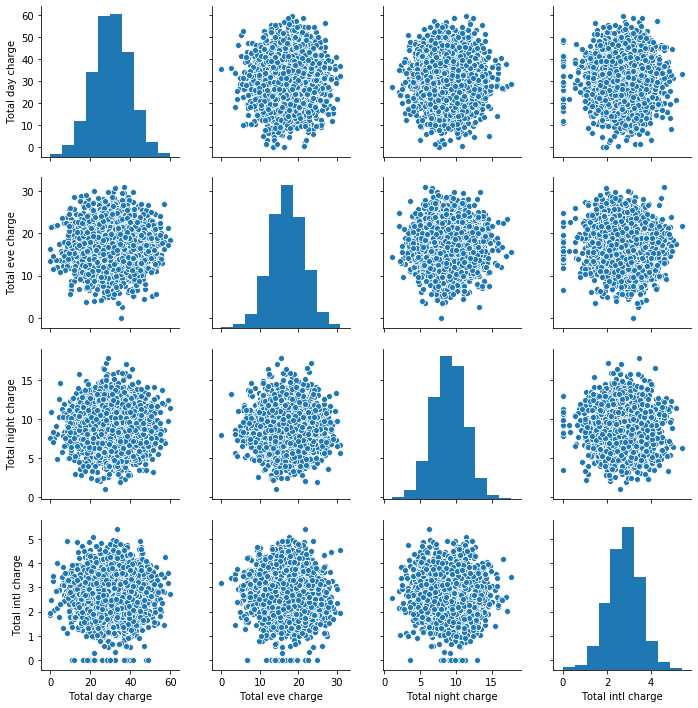

In [7]:
sns.pairplot(df[feat]);

In [8]:
df['Churn_clr'] = df['Churn'].map({False: 'red', True: 'green'})

In [9]:
df[~df['Churn']].head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             45.07              197.4  ...             16.78   
1             27.47              195.5  ...             16.62   
2             41.38              121.2  ...             10.30   
3             50.90               61.9  ...              5.26   
4             28.34              148.3  ...             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Churn_clr  
0                       1  False        red  
1                       1  False        red  
2                       0  False        red  
3                       2  False        red  
4                       3  False        red  

[5 rows x 21 columns]

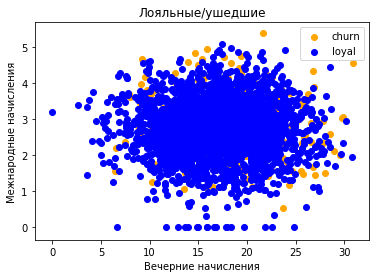

In [10]:
plt.scatter(
    df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
    color='orange', label='churn'
); 
plt.scatter(
    df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'],
    color='blue', label='loyal'
);
plt.xlabel('Вечерние начисления')
plt.ylabel('Межнародные начисления')
plt.title('Лояльные/ушедшие')
plt.legend();

In [11]:
df.drop(feat, axis=1, inplace=True);

In [25]:
tmp = df.copy()
tmp['International plan'] = tmp['International plan'].map({'Yes': True, 'No': False})
sns.heatmap(tmp.corr(),cmap='', vmin=-1, vmax=1);

ValueError: Colormap ice is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

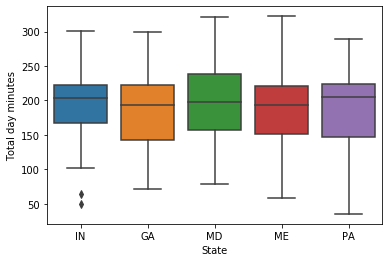

In [13]:
tmp = df.groupby('State')['Total day minutes'].median().sort_values(ascending=False).head().index
sns.boxplot(x='State', y='Total day minutes', data=df[df['State'].isin(tmp)]);

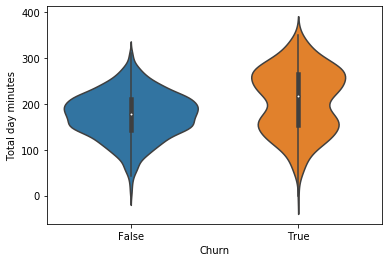

In [14]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

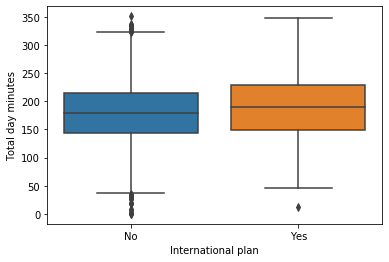

In [15]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

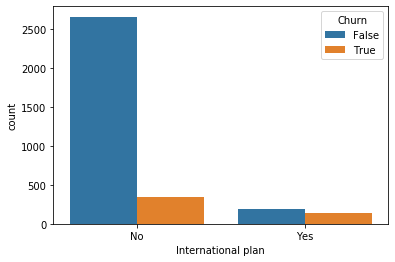

In [16]:
sns.countplot(x='International plan', hue='Churn', data=df);

In [17]:
replaced = {'Yes': 1, 'No': 0}
df2 = df.copy()
df2.drop('State', axis=1, inplace=True)
df2['International plan'] = df2['International plan'].map(replaced)
df2['Voice mail plan'] = df2['Voice mail plan'].map(replaced)
df2.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total eve minutes  Total eve calls  Total night minutes  Total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   Total intl minutes  Total intl calls  Customer service calls  Churn  \
0                10.0                 3                       1  False   
1                13.7                 3                       1  False   
2                12.2                 5                       0  False   
3                 6.6                 7                       2  False   
4                10.1                 3                       3  False   

  Churn_clr  
0       red  
1       red  
2       red  
3       red  
4       red

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(random_state=0)
tsne.fit(df2)

ValueError: could not convert string to float: 'red'

In [ ]:
tsne.embedding_.shape

In [ ]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [ ]:
plt.scatter(
    tsne.embedding_[df2['Churn'].values, 0],
    tsne.embedding_[df2['Churn'].values, 1],
    color='orange'
)
plt.scatter(
    tsne.embedding_[~df2['Churn'].values, 0],
    tsne.embedding_[~df2['Churn'].values, 1],
    color='blue'
);